In [22]:
import subprocess
import os 
import re
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

In [23]:
path = os.walk("convertions30")
total_pocks = []
for root, directories, files in path:
    for file in files:
        total_pocks.append(file)
    break

In [24]:
total_pocks

['6fd3_pocket1.pdb',
 '2ycf_pocket1.pdb',
 '5lqf_pocket1.pdb',
 '5ew8_pocket1.pdb',
 '5yf9_pocket1.pdb',
 '3e7o_pocket1.pdb',
 '4z55_pocket2.pdb',
 '1u59_pocket1.pdb',
 '4ckj_pocket1.pdb',
 '4bkj_pocket1.pdb',
 '3sxs_pocket1.pdb',
 '4bgq_pocket1.pdb',
 '4z55_pocket1.pdb',
 '3aln_pocket2.pdb',
 '1u59_pocket2.pdb',
 '4asz_pocket1.pdb',
 '2wel_pocket2.pdb',
 '3v5w_pocket1.pdb',
 '3iec_pocket2.pdb',
 '4hcu_pocket1.pdb',
 '3dls_pocket1.pdb',
 '4hvs_pocket1.pdb',
 '2xrw_pocket1.pdb',
 '2dq7_pocket1.pdb',
 '5te0_pocket2.pdb',
 '1byg_pocket1.pdb',
 '4asz_pocket2.pdb',
 '3kmu_pocket2.pdb',
 '2eva_pocket1.pdb',
 '3kul_pocket1.pdb',
 '5uyj_pocket1.pdb',
 '1s9i_pocket1.pdb',
 '2ac3_pocket1.pdb',
 '2fst_pocket1.pdb',
 '2r4b_pocket1.pdb',
 '3omv_pocket1.pdb',
 '5mja_pocket1.pdb',
 '6cz4_pocket2.pdb',
 '5k00_pocket1.pdb',
 '6fnk_pocket1.pdb',
 '2vz6_pocket1.pdb',
 '4lg4_pocket1.pdb',
 '4qtc_pocket1.pdb',
 '4l6q_pocket1.pdb',
 '4pf4_pocket1.pdb',
 '4af3_pocket1.pdb',
 '2xir_pocket1.pdb',
 '3dtc_pocket

In [25]:
len(total_pocks)

276

In [26]:
pockets_order = pd.read_excel('pockets_order.xlsx')
total_pocks=list(pockets_order[0])

In [27]:
total_pocks

['1blx_pocket1.pdb',
 '1byg_pocket1.pdb',
 '1fmk_pocket1.pdb',
 '1fmk_pocket2.pdb',
 '1j1b_pocket1.pdb',
 '1o6l_pocket1.pdb',
 '1p4o_pocket1.pdb',
 '1qpc_pocket1.pdb',
 '1s9i_pocket1.pdb',
 '1tki_pocket1.pdb',
 '1u59_pocket1.pdb',
 '1u59_pocket2.pdb',
 '1ua2_pocket1.pdb',
 '1vzo_pocket1.pdb',
 '1wak_pocket1.pdb',
 '1x8b_pocket1.pdb',
 '1xjd_pocket1.pdb',
 '1xjd_pocket2.pdb',
 '2a2a_pocket1.pdb',
 '2ac3_pocket1.pdb',
 '2acx_pocket1.pdb',
 '2acx_pocket2.pdb',
 '2buj_pocket1.pdb',
 '2cmw_pocket1.pdb',
 '2dq7_pocket1.pdb',
 '2dq7_pocket2.pdb',
 '2eva_pocket1.pdb',
 '2f57_pocket1.pdb',
 '2fst_pocket1.pdb',
 '2h6d_pocket1.pdb',
 '2hw6_pocket1.pdb',
 '2i0e_pocket1.pdb',
 '2izr_pocket1.pdb',
 '2j0i_pocket1.pdb',
 '2jam_pocket1.pdb',
 '2jc6_pocket1.pdb',
 '2qlu_pocket1.pdb',
 '2qol_pocket1.pdb',
 '2r2p_pocket1.pdb',
 '2r4b_pocket1.pdb',
 '2r5t_pocket1.pdb',
 '2rei_pocket1.pdb',
 '2rku_pocket1.pdb',
 '2vd5_pocket1.pdb',
 '2vz6_pocket1.pdb',
 '2vz6_pocket2.pdb',
 '2w4o_pocket1.pdb',
 '2wel_pocket

In [7]:
# simil_matrix = np.ones((len(total_pocks),len(total_pocks)))
# simil_matrix = np.ones((len(total_pocks),len(total_pocks)))
# for i in range(len(total_pocks)):
#     for j in range(i+1,len(total_pocks)):
#         print(str(i) +" "+ str(j)+"   "+str(total_pocks[i])+" "+str(total_pocks[j]),end="\r")
#         command = "./find_similarities.sh pockets70/"+str(total_pocks[i])+" pockets70/"+str(total_pocks[j])
# #         print(sp.getoutput(command))
#         simil_matrix[i,j] = simil_matrix[j,i] = float(sp.getoutput(command))
# #         simil_matrix[i,j] = simil_matrix[j,i] = float(sp.getoutput("./find_similarities.sh pocket10.pdb pocket8.pdb"))

In [28]:
simil_matrix = pd.read_excel('simil_matrix30_final.xlsx')
simil_matrix = simil_matrix.drop(['Unnamed: 0'], axis=1)

In [29]:
disim_conversion = lambda t: 1 - t
disimil_matrix = disim_conversion(simil_matrix)

In [30]:
disimil_matrix

,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
0,0.00000,0.81243,1.00000,0.85563,0.64824,0.75064,0.90988,0.68283,0.88259,0.86237,...,0.72379,0.73411,0.74061,0.87213,0.74235,0.70489,0.73853,0.75480,0.83235,0.72857
1,0.81243,0.00000,1.00000,0.84858,0.53176,0.61954,0.82821,0.60849,0.63961,0.83274,...,0.64579,0.59641,0.58089,1.00000,0.61287,0.60338,0.60151,0.67830,0.53244,0.61692
2,1.00000,1.00000,0.00000,0.84614,0.53596,0.51079,0.88530,1.00000,1.00000,0.79435,...,1.00000,1.00000,1.00000,0.50646,0.54051,0.58036,0.55496,1.00000,0.45071,1.00000
3,0.85563,0.84858,0.84614,0.00000,0.87495,0.82614,0.86552,0.83795,0.86961,0.87979,...,0.81617,0.82969,0.88110,0.85302,0.83548,0.86876,0.83688,0.82378,0.83978,0.87588
4,0.64824,0.53176,0.53596,0.87495,0.00000,0.41628,0.86974,0.56940,0.57650,0.84392,...,0.47961,0.60347,0.55960,0.40710,0.37040,0.32514,0.30593,0.61885,0.47749,0.84222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.70489,0.60338,0.58036,0.86876,0.32514,0.39888,0.84216,0.54635,0.64744,0.87102,...,0.49362,0.54557,0.50186,0.40550,0.28839,0.00000,0.26356,0.56338,0.50601,0.61857
272,0.73853,0.60151,0.55496,0.83688,0.30593,0.27159,0.86403,0.60205,0.56354,0.81008,...,0.45742,0.64318,0.52827,0.21865,0.15904,0.26356,0.00000,0.63106,0.52621,0.83999
273,0.75480,0.67830,1.00000,0.82378,0.61885,0.79128,0.85971,0.66940,0.74250,0.85558,...,0.72470,0.73384,0.72319,1.00000,0.67997,0.56338,0.63106,0.00000,0.65285,0.73147
274,0.83235,0.53244,0.45071,0.83978,0.47749,0.51073,0.88741,0.57022,0.55299,0.84032,...,0.59369,0.60493,0.54736,0.51898,0.53704,0.50601,0.52621,0.65285,0.00000,0.55936


## Clustering - Searching for number of clusters

In [31]:
poc_size = []
with open('Human_Kinases_Pockets_Sizes.txt','r') as f:
    for line in f:
        count = 0
        for word in line.split("||"):
            if count == 0:
                name = word
            elif count == 1:
                name = name+"_"+word
            elif count == 2:
                siz = float(word)
            count += 1
        poc_size.append([name,siz])

FileNotFoundError: [Errno 2] No such file or directory: 'Human_Kinases_Pockets_Sizes.txt'

In [ ]:
kinase_names = []
sizes = []
count = 0
for kinase in total_pocks:
    kin_name = str(kinase[:4])+"_"+re.findall(r'[0-9]+', total_pocks[count][4:])[0]
    kinase_names.append(kin_name)
    for cen_poc in poc_size:
        if cen_poc[0] == kin_name:
            sizes.append(cen_poc[1])
    count = count + 1

In [ ]:
def create_manifold(labels):
    final_clusters = []
    final_clusters.append(kinase_names)
    final_clusters.append(list(labels))
    final_clusters = np.transpose(final_clusters)
    data_pockets_manifold = pd.DataFrame(final_clusters, columns= ['Pockets', 'Clusters'])
    data_pockets_manifold["x"] = mds_coords[:,0]
    data_pockets_manifold["y"] = mds_coords[:,1]
#     data_pockets_manifold["size"] = sizes
    return data_pockets_manifold

In [ ]:
c=Counter([2,3,2,3,1,31,2])
print(c.values())
print(c)
print(c[2])

In [ ]:
def create_manifold_with_outliers(labels):
    num_clust = len(np.unique(np.array(labels)))
    c=Counter(labels)
    
    
    final_clusters = []
    final_clusters.append(kinase_names)
    final_clusters.append(list(labels))
    final_clusters = np.transpose(final_clusters)
    data_pockets_manifold = pd.DataFrame(final_clusters, columns= ['Pockets', 'Clusters'])
    data_pockets_manifold["x"] = mds_coords[:,0]
    data_pockets_manifold["y"] = mds_coords[:,1]
#     data_pockets_manifold["size"] = sizes
    
    for i in range(num_clust):
        if c[i]>25:
            data_pockets_manifold = data_pockets_manifold[data_pockets_manifold["Clusters"] != str(i)]
   
    return data_pockets_manifold

In [ ]:
import numpy as np  
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt
from sklearn import manifold  # multidimensional scaling
from matplotlib.pyplot import figure



In [32]:
def create_clusters_file(labels,clusters):
    
    final_clusters = []
    final_clusters.append(kinase_names)
    final_clusters.append(list(labels))
    final_clusters = np.transpose(final_clusters)
    df = pd.DataFrame(final_clusters, columns= ['Kinase', 'Cluster'])
    num_clust = len(np.unique(np.array(labels)))
    

  
    for i in range(num_clust):
        df1 = df[df["Cluster"] == str(i)]
        df1.to_excel("Pockets30_Agglomerative/Cluster"+str(clusters)+"/Clusters_"+str(i)+".xlsx", index = False, header=True)
        
    df.to_excel("Pockets30_Agglomerative/Pockets30_Clusters_"+str(clusters)+".xlsx", index = False, header=True)


In [33]:
def create_histogram(labels,i):
# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
    freq, bins, patches = plt.hist(labels, edgecolor='white', label='kinases', bins=i)

    # x coordinate for labels
    bin_centers = np.diff(bins)*0.5 + bins[:-1]

    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
                   xy = (x, height),             # top left corner of the histogram bar
                   xytext = (0,0.2),             # offsetting label position above its bar
                   textcoords = "offset points", # Offset (in points) from the *xy* value
                   ha = 'center', va = 'bottom'
                   )
      n = n+1

    plt.legend()
    plt.gca().set(title=str(i)+' Clusters Frequency Histogram', ylabel='Frequency');
    plt.show

In [34]:
mds_model = manifold.MDS(n_components = 2, random_state = 1,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(disimil_matrix)  
mds_coords = mds_model.fit_transform(disimil_matrix)

Successfully created the directory /home/user/Documents/algorithms_in_structural_biology/Final/Pockets30_Agglomerative
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 12 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


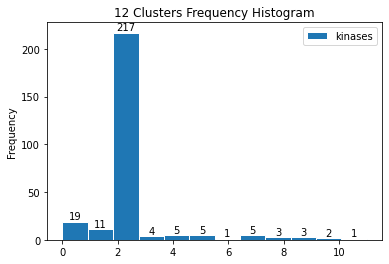

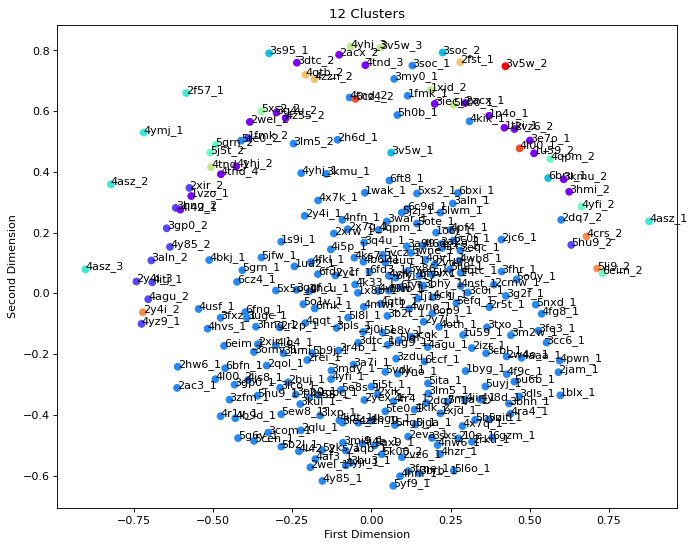

In [37]:
silhouette_totals = []
path = "/home/user/Documents/algorithms_in_structural_biology/Final/Pockets30_Agglomerative"
try:
    os.makedirs(path, exist_ok=True)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print("Successfully created the directory %s" % path)
    
    
K = range(12,13)
for i in K:
    cluster = AgglomerativeClustering(n_clusters=i,affinity='precomputed', linkage='average')
    cluster.fit(disimil_matrix)
    create_histogram(cluster.labels_,i)
    path = "/home/user/Documents/algorithms_in_structural_biology/Final/Pockets30_Agglomerative/Cluster"+str(i)
    try:
        os.makedirs(path, exist_ok=True)
    except OSError:
        print ("Creation of the directory %s failed" % path)
        
    create_clusters_file(cluster.labels_,i)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster "+str(i)+" ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    ###### plot 1 ################
    data_kinases_manifold = create_manifold(cluster.labels_)
    fig = px.scatter(data_kinases_manifold, x="x", y="y", color="Clusters", hover_data=["Pockets"],title=str(i)+' Clusters')
#     , size='size'
    fig.write_html("agglomerative2D.html")
    fig.show()
    ###### plot 1.1 ################
    data_kinases_manifold_outliers = create_manifold_with_outliers(cluster.labels_)
    fig = px.scatter(data_kinases_manifold_outliers, x="x", y="y", color="Clusters", hover_data=["Pockets"],title=str(i)+' Clusters')
#     , size='size'
    fig.show()
    ###### plot 2 ################
    fig = px.scatter_3d(data_kinases_manifold, x='x', y='y',
              color="Clusters",range_z = (0, 300),hover_data=["Pockets"], title=str(i)+' Clusters')
#     , z='size'
    fig.show()
    ##### plot 3 ###############
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(mds_coords[:,0],mds_coords[:,1], c=cluster.labels_, cmap='rainbow')
    #     facecolors = 'red', edgecolors = 'none')  # points in white (invisible)
    labels = kinase_names
    for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
        plt.annotate(label, (x,y), xycoords = 'data')
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title(str(i)+" Clusters")   
    plt.show()
    silhouette_totals.append(metrics.silhouette_score(disimil_matrix, cluster.labels_, metric='precomputed'))

In [30]:
silhouette_totals

[0.12589805189074127,
 0.11762370743221054,
 0.08060366642830365,
 0.08108411224427986,
 0.07903712846758945,
 0.07135179301404106,
 0.07021469358540212,
 0.07078362855354871,
 0.08800486506776038,
 0.08521589222941849,
 0.08489010309723825,
 0.08201606139049245,
 0.08772184703346178,
 0.08793207031593517,
 0.09804047755056107]

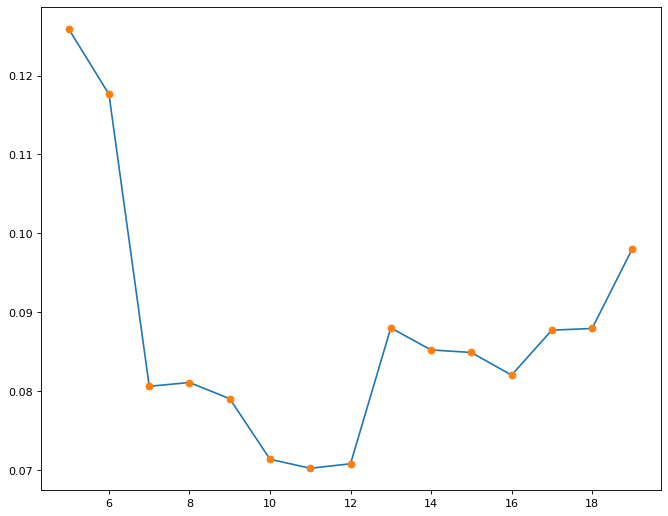

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(K, silhouette_totals)
plt.plot(K, silhouette_totals, 'o')
plt.show()